In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import seaborn as sns

In [117]:
os.chdir('/Users/zoespiegelhoff/Downloads')
crux = pd.read_csv('bigquery_extract.csv')

In [118]:
crux['origin']=crux['origin'].str.replace('https://www.', '')
crux = crux.rename({'sumdens': 'DensitySum'}, axis=1)

<ipython-input-118-dc60612d186a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  crux['origin']=crux['origin'].str.replace('https://www.', '')


In [122]:
crux.head()

,origin,form,Month,perf_flag,DensitySum
0,chron.com,phone,March,needs imp,0.1039
1,houstonchronicle.com,desktop,March,good,0.1885
2,timesunion.com,desktop,March,needs imp,0.0451
3,sfchronicle.com,tablet,March,good,0.0127
4,houstonchronicle.com,tablet,March,needs imp,0.0052


In [123]:
crux_chron = crux.loc[crux['origin'] == 'chron.com']
crux_hous = crux.loc[crux['origin'] == 'houstonchronicle.com']
crux_times = crux.loc[crux['origin'] == 'timesunion.com']
crux_sf = crux.loc[crux['origin'] == 'sfchronicle.com']
crux_sfg = crux.loc[crux['origin'] == 'sfgate.com']

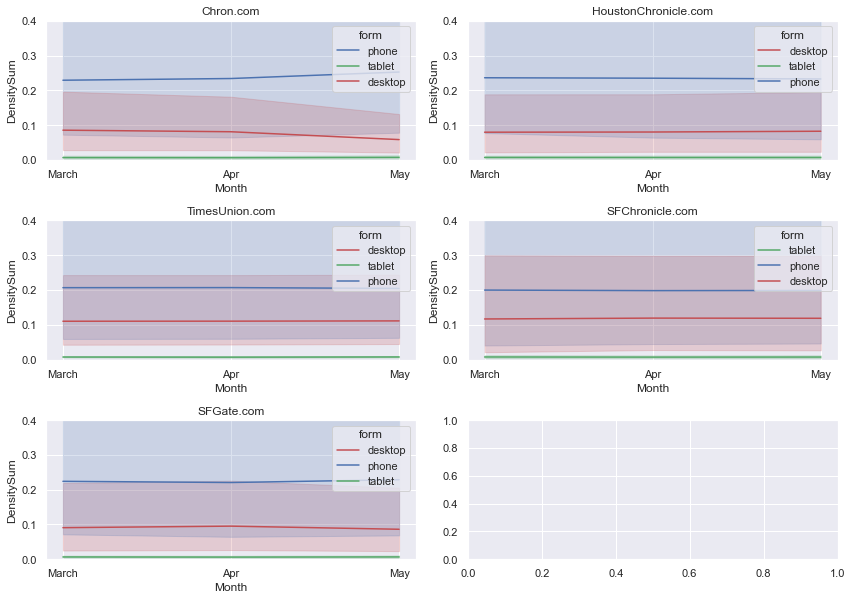

In [148]:
plt.rcParams["figure.figsize"] = [12.00, 8.50]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3,2)
ax1 =sns.lineplot(data=crux_chron, x='Month', y='DensitySum', hue='form', palette={'phone':'b', 'tablet':'g', 'desktop':'r'}, ax=axes[0,0]).set(title='Chron.com')
ax2 = sns.lineplot(data=crux_hous, x='Month', y='DensitySum', hue='form',palette={'phone':'b', 'tablet':'g', 'desktop':'r'}, ax=axes[0,1]).set(title='HoustonChronicle.com')
ax3 = sns.lineplot(data=crux_times, x='Month', y='DensitySum', hue='form',palette={'phone':'b', 'tablet':'g', 'desktop':'r'}, ax=axes[1,0]).set(title='TimesUnion.com')
ax4 = sns.lineplot(data=crux_sf, x='Month', y='DensitySum', hue='form',palette={'phone':'b', 'tablet':'g', 'desktop':'r'}, ax=axes[1,1]).set(title='SFChronicle.com')
ax5 = sns.lineplot(data=crux_sfg, x='Month', y='DensitySum', hue='form',palette={'phone':'b', 'tablet':'g', 'desktop':'r'}, ax=axes[2,0]).set(title='SFGate.com')

axes[0,0].set_ylim(0,0.4)
axes[0,1].set_ylim(0,0.4)
axes[1,0].set_ylim(0,0.4)
axes[1,1].set_ylim(0,0.4)
axes[2,0].set_ylim(0,0.4)

fig.tight_layout()
plt.show()

In [170]:
crux_good = crux.loc[crux['perf_flag'] == 'good']
c_good = pd.pivot_table(crux_good, values='DensitySum', index=['origin'],
                       columns=['Month'], aggfunc=np.sum)
c_good = c_good.reset_index()
cg = pd.melt(c_good, id_vars=['origin'], var_name="Month", value_name="Density")

(0.7, 0.85)

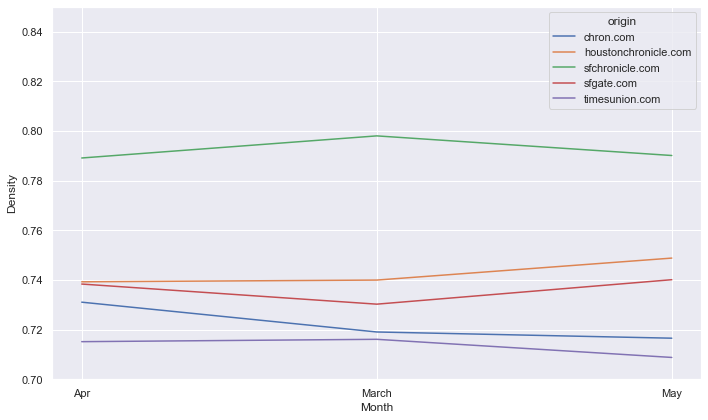

In [178]:
plt.rcParams["figure.figsize"] = [10.00, 6]
plt.rcParams["figure.autolayout"] = True

sns.lineplot(data=cg, x='Month', y='Density', hue='origin').set_ylim(0.7,0.85)